In [1]:
 
import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights


vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

W0806 11:33:01.838599 14600 deprecation.py:506] From C:\Users\acer\Anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:

# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                     
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Using TensorFlow backend.


In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [14]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
163/163 [==============================] - 277s 2s/step - loss: 0.2486 - acc: 0.9130 - val_loss: 0.2877 - val_acc: 0.8974
Epoch 2/50
163/163 [==============================] - 199s 1s/step - loss: 0.1307 - acc: 0.9477 - val_loss: 0.2822 - val_acc: 0.9006
Epoch 3/50
163/163 [==============================] - 197s 1s/step - loss: 0.1273 - acc: 0.9544 - val_loss: 0.3200 - val_acc: 0.9135
Epoch 4/50
163/163 [==============================] - 201s 1s/step - loss: 0.1464 - acc: 0.9469 - val_loss: 0.3044 - val_acc: 0.9151
Epoch 5/50
163/163 [==============================] - 196s 1s/step - loss: 0.1144 - acc: 0.9586 - val_loss: 0.4349 - val_acc: 0.8910
Epoch 6/50
163/163 [==============================] - 196s 1s/step - loss: 0.1008 - acc: 0.9636 - val_loss: 0.2758 - val_acc: 0.9006
Epoch 7/50
163/163 [==============================] - 195s 1s/step - loss: 0.0849 - acc: 0.9670 - val_loss: 0.3012 - val_acc: 0.9135
Epoch 8/50
163/163 [==============================] - 196s 1s/step - 

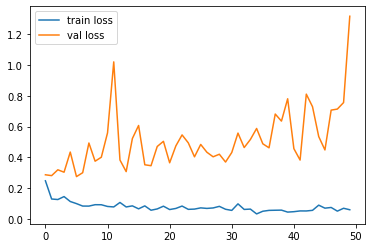

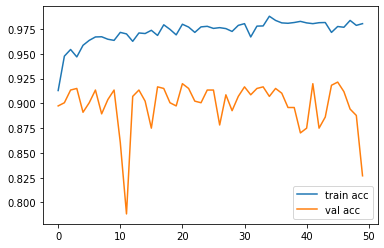

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred

array([[9.6932673e-01, 3.0673277e-02],
       [8.1937289e-01, 1.8062712e-01],
       [1.8121190e-09, 1.0000000e+00],
       ...,
       [5.0293285e-05, 9.9994969e-01],
       [5.6889918e-02, 9.4311011e-01],
       [1.4393556e-10, 1.0000000e+00]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [21]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_vgg16.h5')

W0806 14:47:48.038695 14600 deprecation.py:506] From C:\Users\acer\Anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0806 14:47:48.040694 14600 deprecation.py:506] From C:\Users\acer\Anaconda\envs\tensorflow_cpu\lib\site-packages\tensorflow_core\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
img=image.load_img('Datasets/Test/Normal/IM-0001-0001.jpeg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[32., 32., 32.],
        [31., 31., 31.],
        [32., 32., 32.],
        ...,
        [32., 32., 32.],
        [30., 30., 30.],
        [35., 35., 35.]],

       [[34., 34., 34.],
        [33., 33., 33.],
        [30., 30., 30.],
        ...,
        [30., 30., 30.],
        [33., 33., 33.],
        [33., 33., 33.]],

       [[33., 33., 33.],
        [32., 32., 32.],
        [33., 33., 33.],
        ...,
        [32., 32., 32.],
        [35., 35., 35.],
        [31., 31., 31.]],

       ...,

       [[33., 33., 33.],
        [30., 30., 30.],
        [28., 28., 28.],
        ...,
        [33., 33., 33.],
        [33., 33., 33.],
        [32., 32., 32.]],

       [[30., 30., 30.],
        [27., 27., 27.],
        [29., 29., 29.],
        ...,
        [32., 32., 32.],
        [33., 33., 33.],
        [35., 35., 35.]],

       [[32., 32., 32.],
        [31., 31., 31.],
        [29., 29., 29.],
        ...,
        [32., 32., 32.],
        [30., 30., 30.],
        [34., 34., 34.]]

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)


array([[0.8863217 , 0.11367822]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [32]:
imgs=image.load_img('Datasets/Test/Pneumonia/person1_virus_6.jpeg',target_size=(224,224))

In [33]:
x1=image.img_to_array(imgs)
x1

array([[[220., 220., 220.],
        [215., 215., 215.],
        [211., 211., 211.],
        ...,
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        [ 12.,  12.,  12.]],

       [[218., 218., 218.],
        [216., 216., 216.],
        [212., 212., 212.],
        ...,
        [ 18.,  18.,  18.],
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.]],

       [[215., 215., 215.],
        [216., 216., 216.],
        [209., 209., 209.],
        ...,
        [ 34.,  34.,  34.],
        [ 18.,  18.,  18.],
        [ 11.,  11.,  11.]],

       ...,

       [[ 23.,  23.,  23.],
        [ 23.,  23.,  23.],
        [ 23.,  23.,  23.],
        ...,
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.]],

       [[ 23.,  23.,  23.],
        [ 23.,  23.,  23.],
        [ 23.,  23.,  23.],
        ...,
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.]],

       [[ 23.,  23.,  23.],
        [ 23.,  23.,  23.],
        [ 23.,  

In [34]:
x1.shape

(224, 224, 3)

In [35]:
x1=x1/255

In [36]:

x1=np.expand_dims(x1,axis=0)
img_data=preprocess_input(x1)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0.91922545, 0.08077449]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
a.shape

(1,)

In [39]:
if(a==1):
    print("Normal")
else:
    print("Infected")

Infected
